In [1]:
import pandas as pd
# import numpy as np
import os
os.chdir('/Users/daniel.lopes/Projects/personal/ModelCrafter')
from crafter.linreg.ols import OLS
from utils.data_split import split_data
# Prepare data
data = pd.read_csv('data/raw/prostate.csv').drop(columns = "train")
X_train, X_test, y_train, y_test = split_data(data=data, target_column='lcavol', split_method='random', test_size=0.2)

# Initialize and fit the OLSLinearModel
model = OLS(fit_intercept=True)
model.fit(X_train, y_train)

# Make predictions
predictions = model.predict(X_test)

# Summarize the model
summary = model.model_summary()

summary

,Feature,Coefficient,Std Error,Z Score,P Value,95% CI Lower,95% CI Upper,Note
0,lweight,-2.4541,1.3811,-1.7769,0.0756,-5.1610,0.2528,Low Z-score
1,age,-0.1763,0.2568,-0.6867,0.4922,-0.6796,0.3270,Low Z-score
2,lbph,0.0256,0.0125,2.0558,0.0398,0.0012,0.0501,
3,svi,-0.0720,0.0664,-1.0851,0.2779,-0.2022,0.0581,Low Z-score
4,lcp,-0.0223,0.2765,-0.0805,0.9358,-0.5642,0.5196,Low Z-score
5,gleason,0.3151,0.0946,3.3321,0.0009,0.1298,0.5005,
6,pgg45,0.2461,0.1625,1.5141,0.1300,-0.0725,0.5647,Low Z-score
7,lpsa,-0.0057,0.0048,-1.1880,0.2348,-0.0150,0.0037,Low Z-score
8,Intercept,0.5305,0.1034,5.1304,0.0000,0.3278,0.7332,


In [2]:
mean_error = model.evaluate(X_test, y_test)
print(f"Mean Prediction Error:{mean_error:.3}")

Mean Prediction Error:0.532


In [4]:
expected_error = model.evaluate_expected_error(X_test, y_test)
print(f"Expected Error of the Estimate: {expected_error:.3} ")

Expected Error of the Estimate: 0.896 


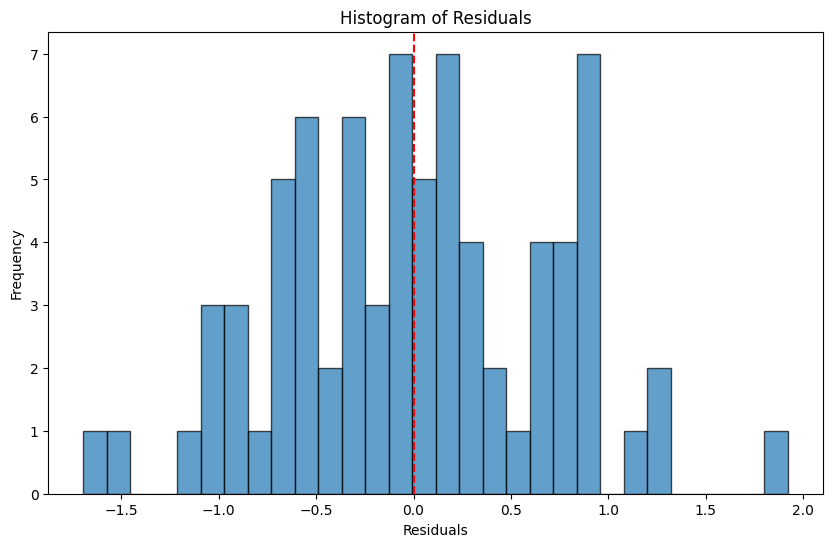

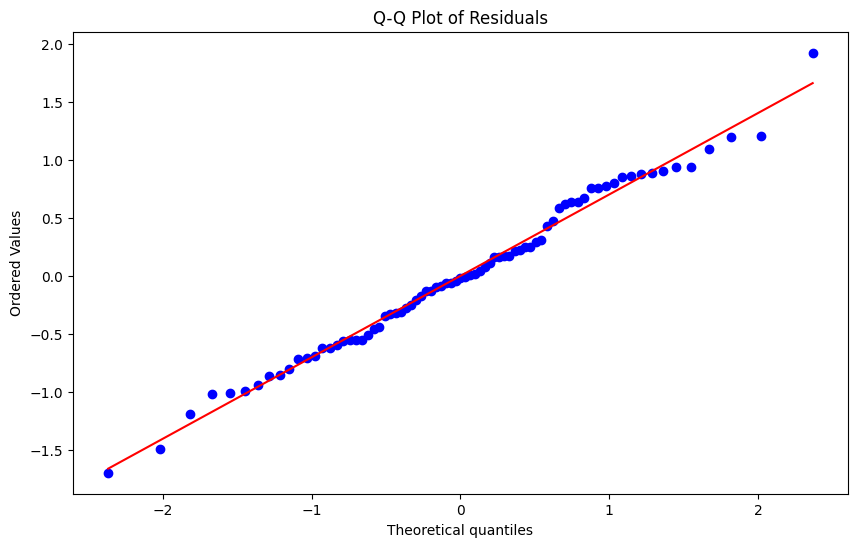

In [5]:
model.plot_residuals()